#importing libraries

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
sns.set()

In [81]:
from mlxtend.plotting import plot_decision_regions
import missingno as msno
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [82]:
from sklearn.metrics import pair_confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

lets start reading the training dataset, which we got in CSV format.

In [83]:
df=pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#Exploratory Data Analysis (EDA)

Exploring Dataset columns

In [84]:
df.columns #check columns available in our data set

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [85]:
df.info() #get more information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [86]:
df.describe() #understand statistics of the data set

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [87]:
df.describe().T #T transpose the dataset (interchange row and column)

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [88]:
df.isnull() #checking if any null values present

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [89]:
df.isnull().head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


In [90]:
df.isnull().sum() #get the total number of null values in the dataset

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

We observe no missing values from the above code, which is misleading. Here in this dataset, missing values are encoded as 0. Therefore, we replace the 0 values with NaN and then blame them properly.

Let us handle the missing values

In [91]:
#Replace 0 values with NaN:

df_copy=df.copy(deep=True)
#Replace 0 values with NaN:
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0, np.NaN)

# Showing the count of NaNs
print(df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


We replaced the zeros with NaN values to maintain the dataset’s authenticity and then attributed these missing values to the respective columns’ mean or median.

#Data Visualization

#Data Distribution before Imputing Missing values

 We visualize the distribution of each feature in the dataset before removing null values.

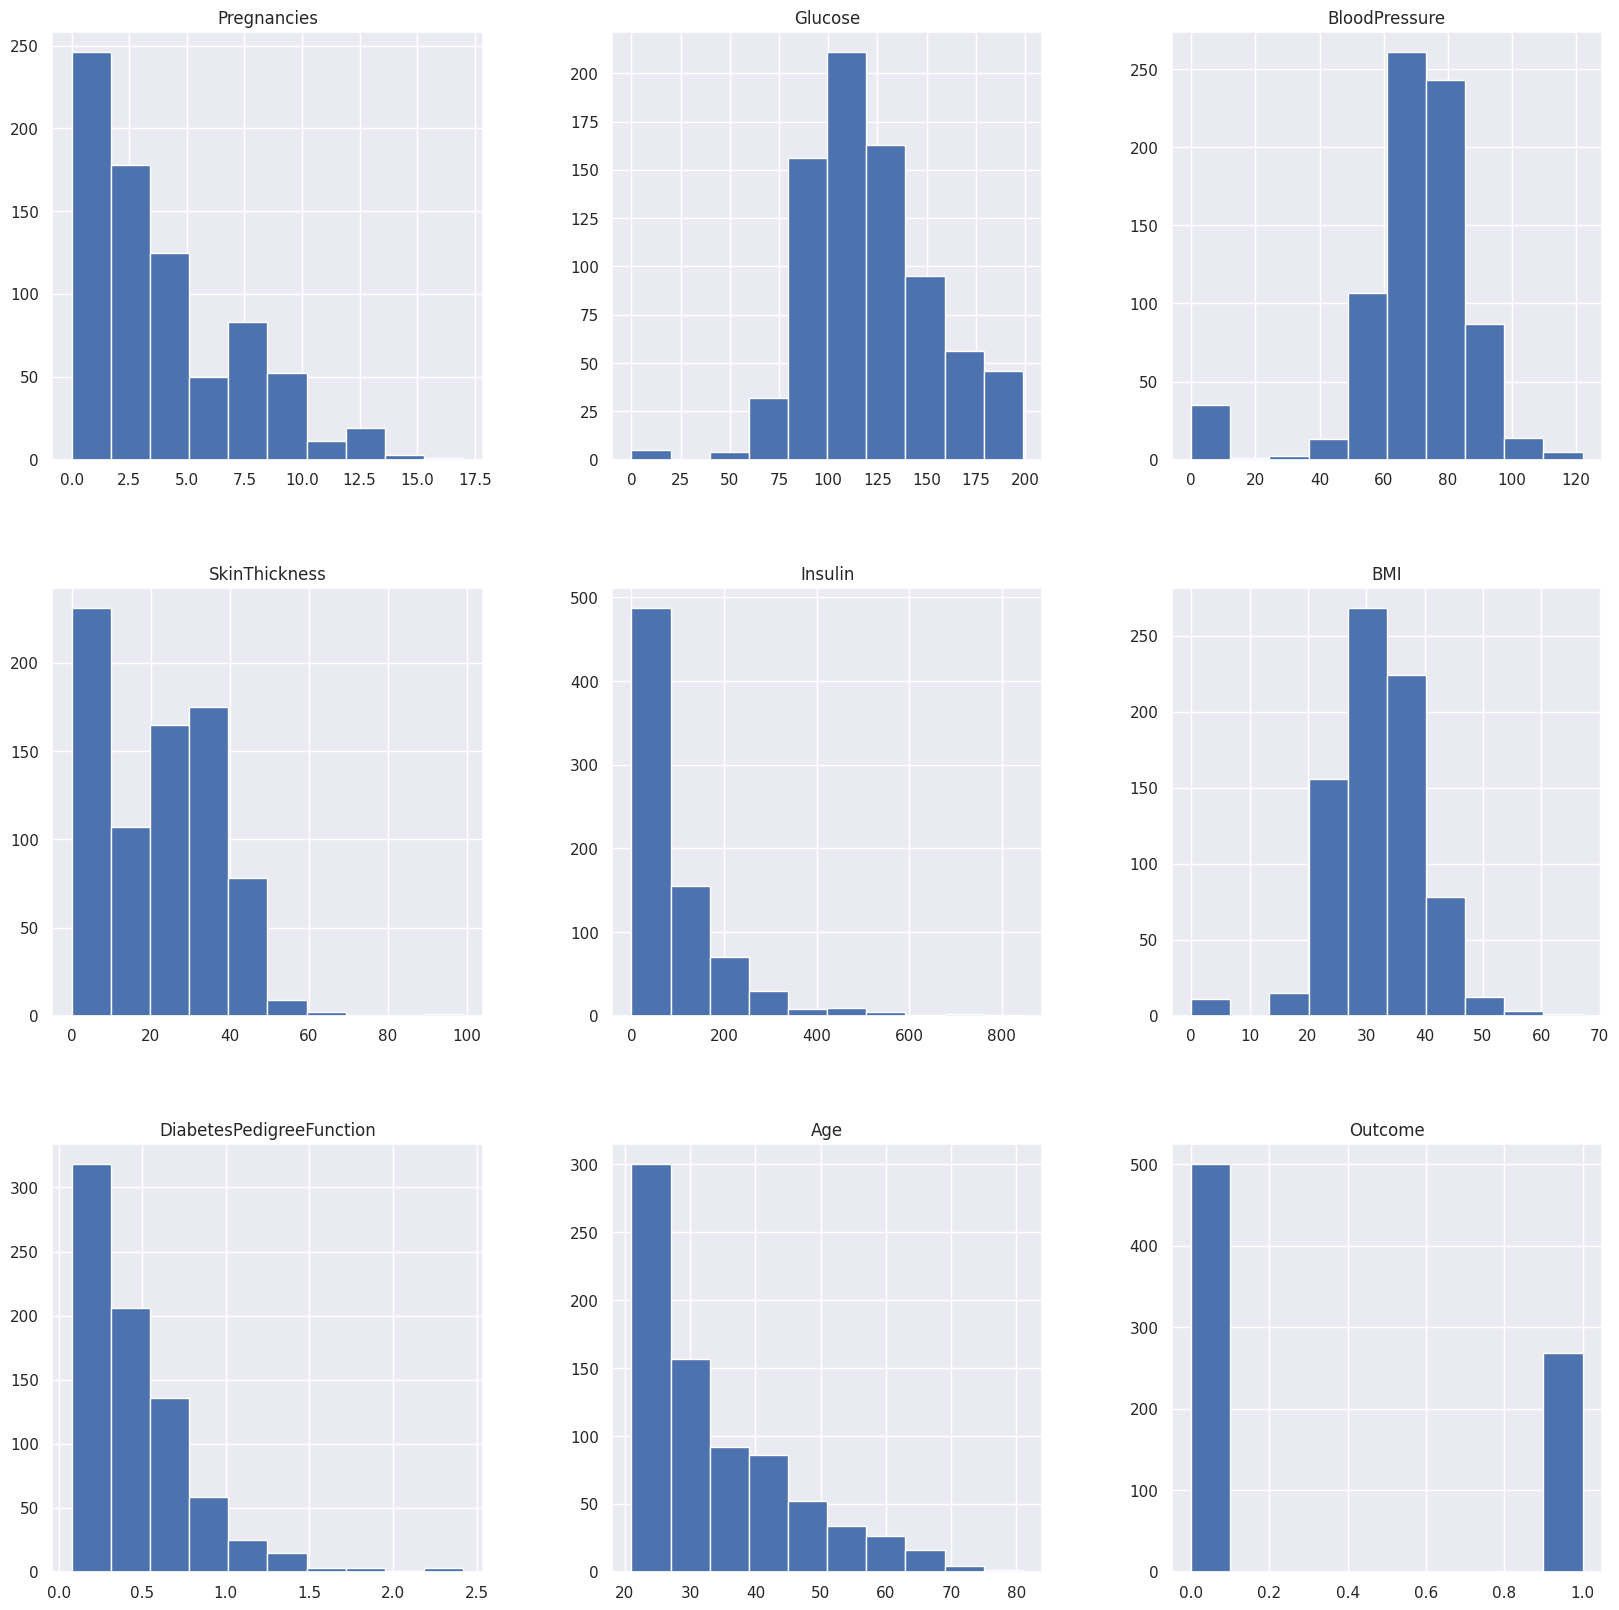

In [92]:
p=df.hist(figsize=(20,20))

Here we have seen the distribution of each feature, whether dependent or independent.

#Imputing Missing Values

In [93]:
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace=True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace=True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace=True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace=True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace=True)

#Data Distribution After Imputing Missing Values

Lets, visualize the distribution of each feature again after imputing the missing values

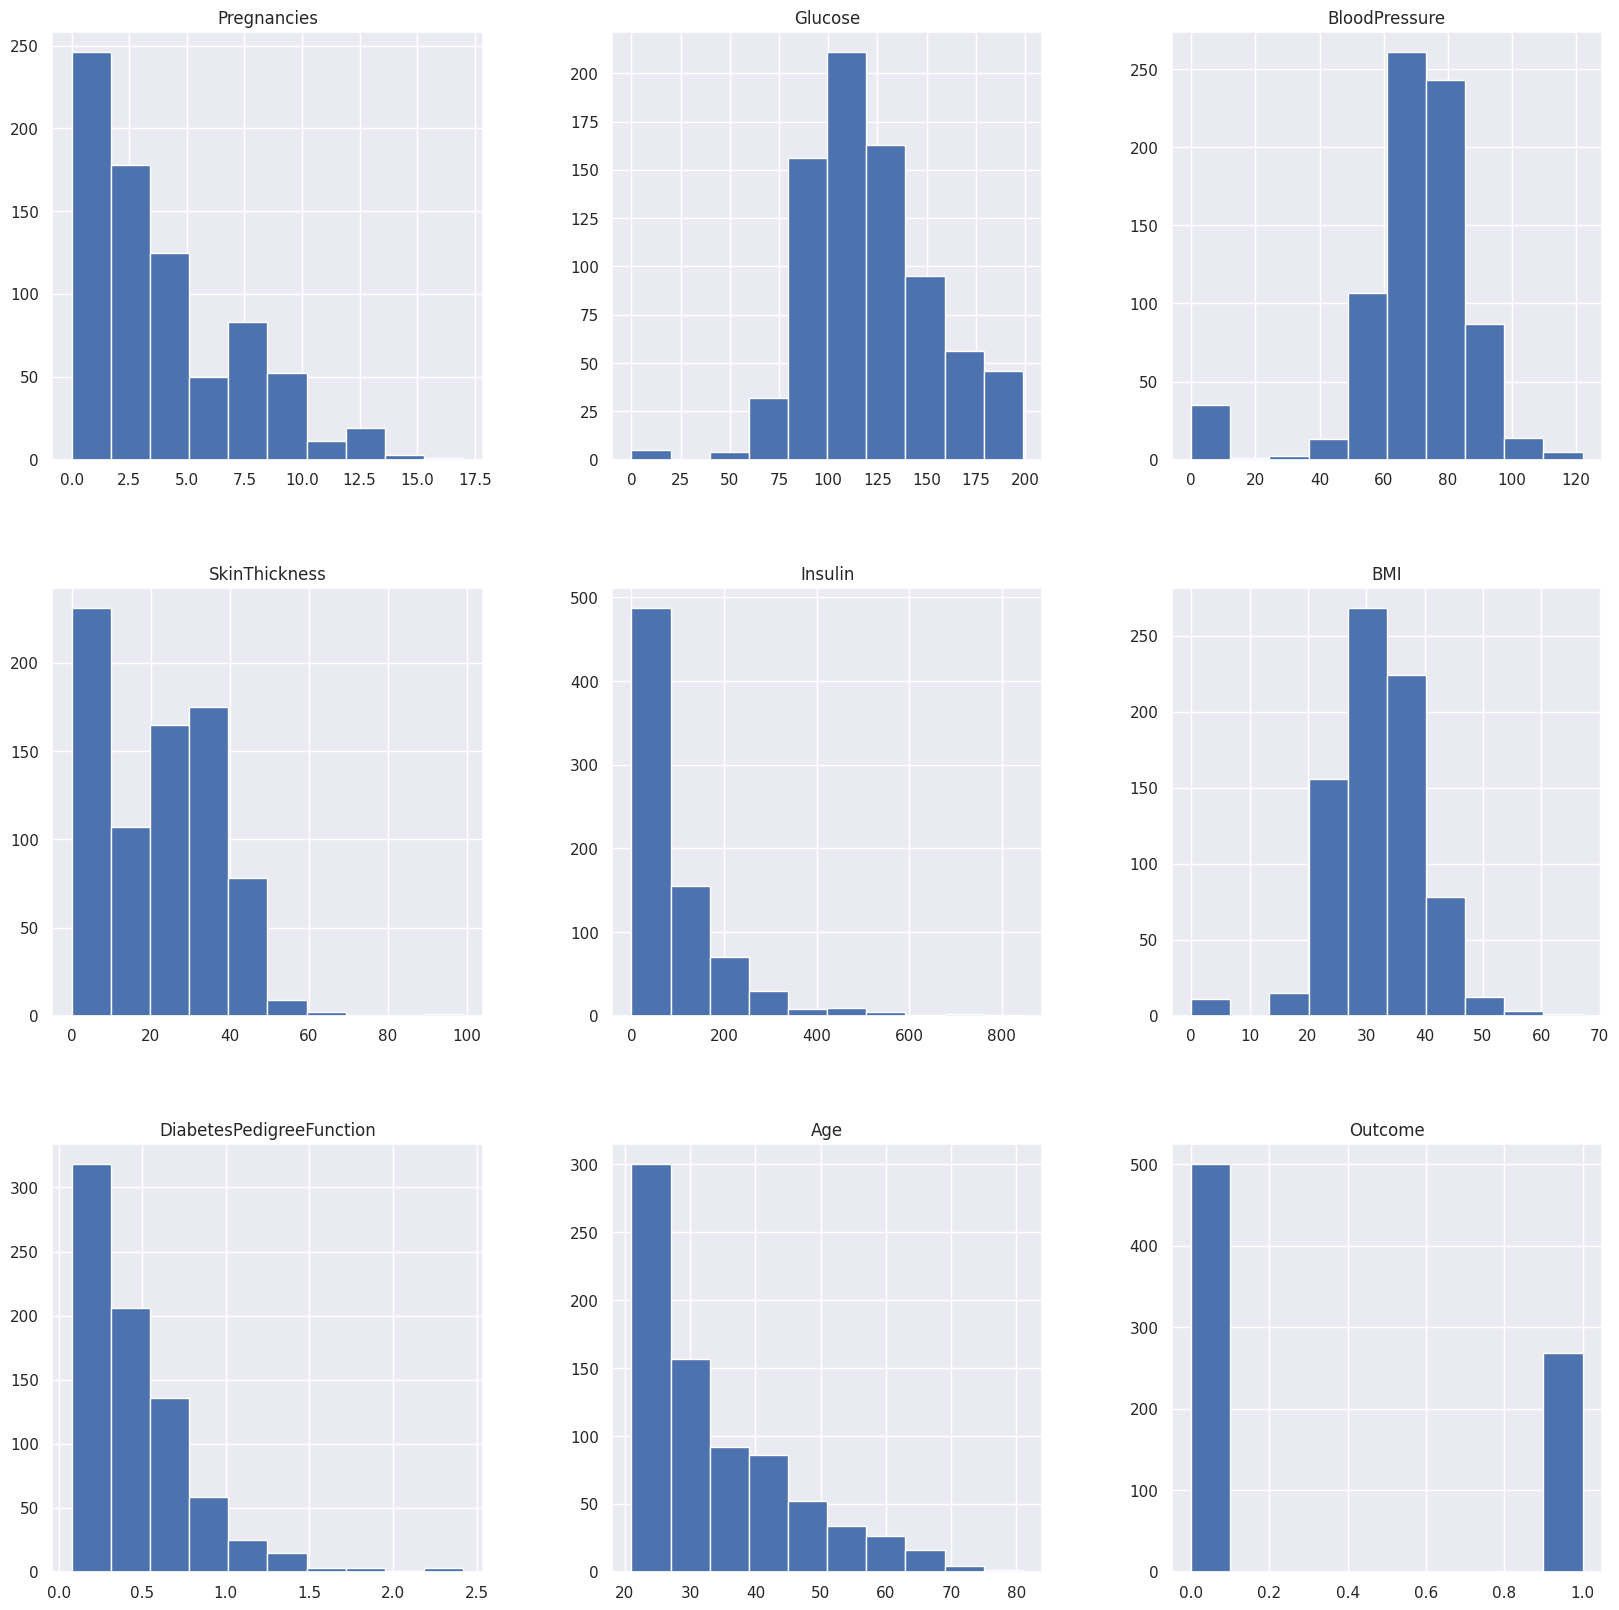

In [94]:
p=df.hist(figsize=(20,20))

In age column after removal of the null values, we can see that there is a spike at the range of 50 to 100 which is quite logical as well.

#Null Count Analysis

To verify that there are no null values left in the dataset, wechck by using the Missingno library

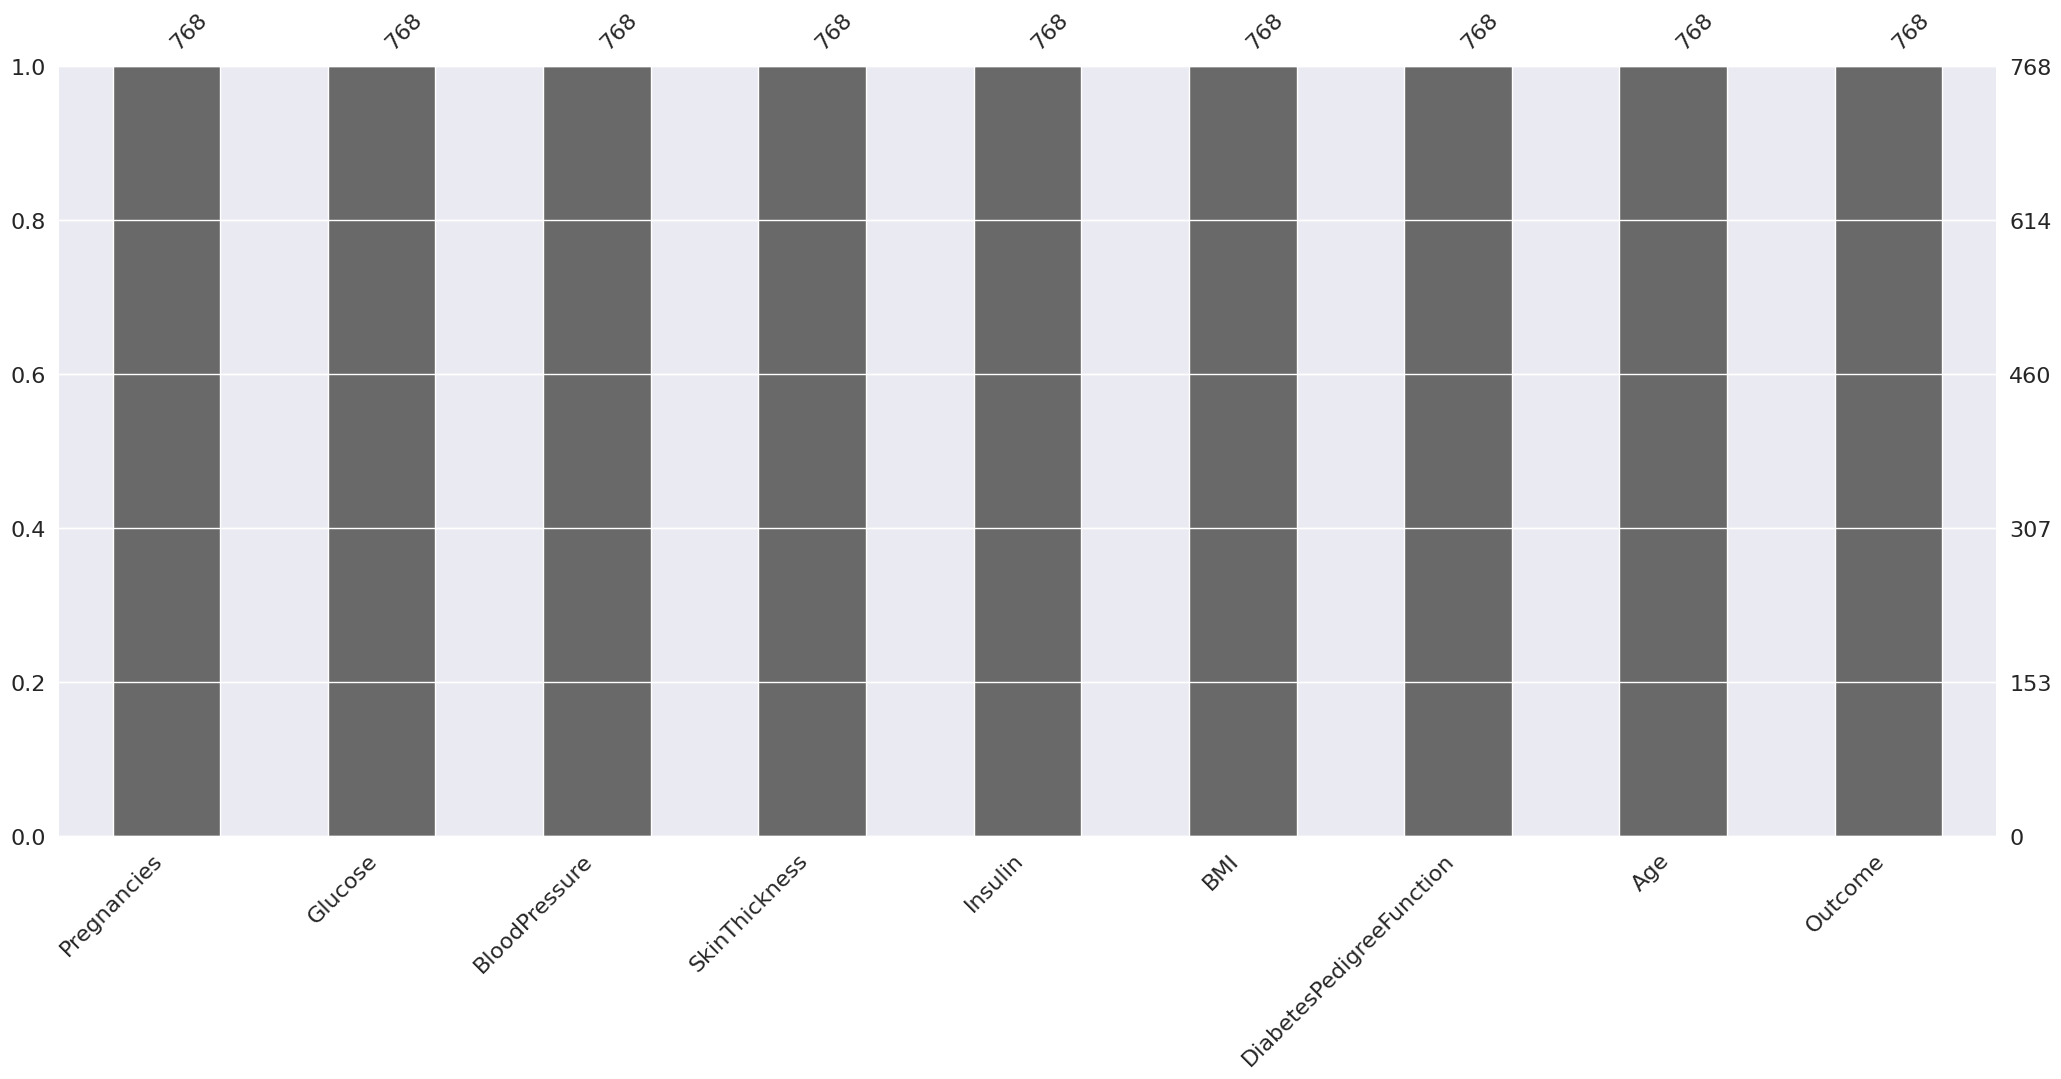

In [95]:
p = msno.bar(df)

Outcome
0    500
1    268
Name: count, dtype: int64


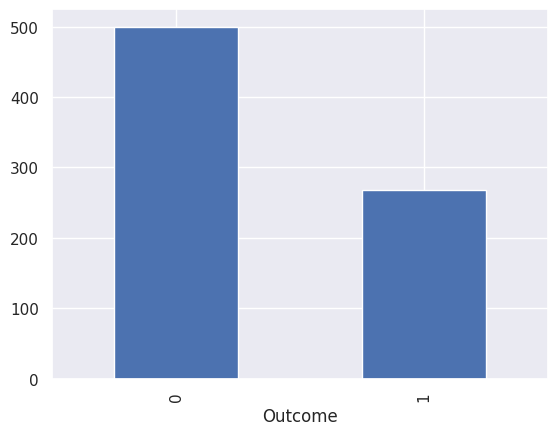

In [96]:
color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = df["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(df.Outcome.value_counts())
p = df.Outcome.value_counts().plot(kind="bar")

The above visualization indicates that our training dataset is imbalanced. The number of non-diabetic patients is almost double that of diabetic patients.

#Distribution and Outliers of Insulin

We examine the distribution and outliers for the ‘Insulin’ feature using both a distplot and a boxplot

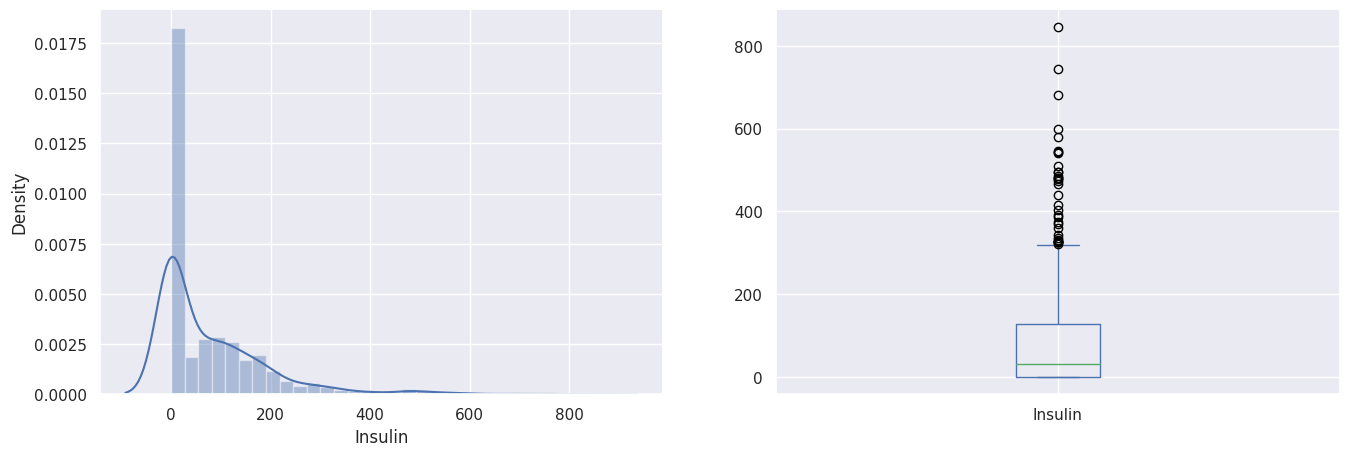

In [97]:
plt.subplot(121)
sns.distplot(df['Insulin'])
plt.subplot(122)
df['Insulin'].plot.box(figsize=(16, 5))
plt.show()

The distplot helps us understand the distribution of the ‘Insulin’ feature, while the boxplot reveals any outliers present. This combined approach provides a comprehensive view of the data, highlighting any potential issues that need to be addressed during further analysis.

#Correlation between all the features


Let’s analyze the correlation between all the features in the dataset before any data cleaning. This will help us understand the relationships between different features

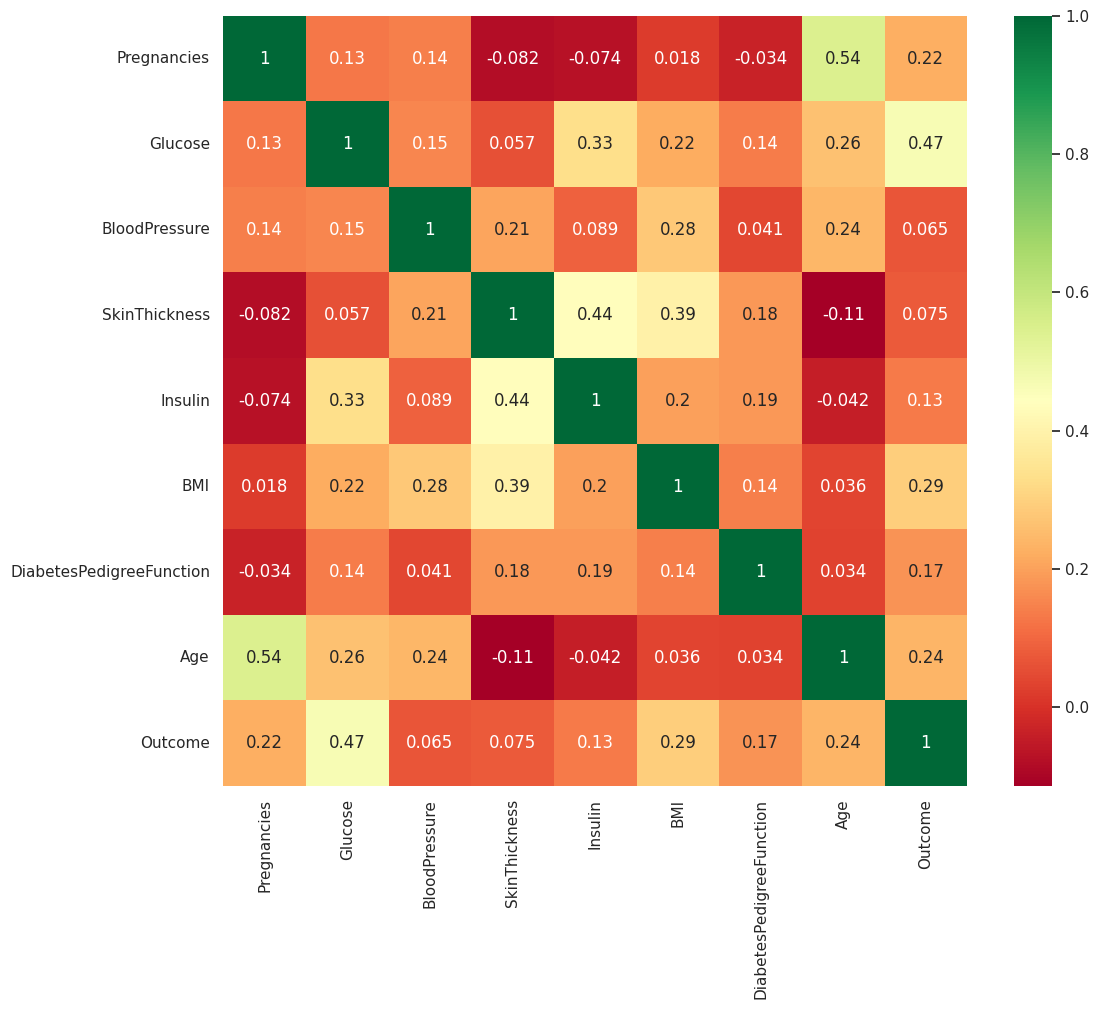

In [98]:
plt.figure(figsize=(12, 10))
# Using seaborn to create a heatmap for the correlation matrix
p = sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')

The heatmap above shows the correlation coefficients between each pair of features in the dataset. The correlation coefficient ranges from -1 to 1, where:

1 indicates a perfect positive correlation,
-1 indicates a perfect negative correlation,
0 indicates no correlation.
By examining the heatmap, we can identify which features strongly correlate with each other and with the target variable ‘Outcome’’ This information is crucial for feature selection and engineering steps in the machine learning pipeline.

for example skinThickness Inversely corelates with Pregnencies Likewise skinThickness also Inversely corelates with Age factor, Likewise Insulin inversely corelates with Age where it directly corelates with skinThickness.

#Scaling the Data

#Previewing the Data Before Scaling

Before scaling the data, let’s take a quick look at the first few rows of the testing data

In [99]:
df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


#Applying Standard Scaling

Next, we apply standard scaling to the training dataset. Standard scaling normalize the data, ensuring that each feature contributes equally to the machine-learning model

In [100]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X = pd.DataFrame(sc_X.fit_transform(df_copy.drop(['Outcome'], axis=1)),

columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])

X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


After scaling, the values of all features are now on the same scale. This helps our machine learning model perform better because no single feature will dominate due to its larger values

#Exploring the Target Column

Let’s also take a look at our target variable, ‘Outcome’:



In [101]:
y = df_copy.Outcome
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

The ‘Outcome’ column above shows whether a patient has diabetes (1) or not (0).

#Model Building


# Splitting the Dataset

First, we need to split the dataset into features (X) and target (y):

In [102]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

Now, we split the data into training and testing sets using the train_test_split Function:



In [103]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7)

#Random Forest

Building the model using Random Forest:

In [104]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

Let's, check the accuracy of the model on the training dataset:

In [105]:
rfc_train = rfc.predict(X_train)
from sklearn import metrics
print("Training Accuracy =", format(metrics.accuracy_score(y_train, rfc_train)))


Training Accuracy = 1.0


The model is overfitted on the training data. Now, let’s check the accuracy of the test data

In [106]:
predictions = rfc.predict(X_test)
print("Test Accuracy =", format(metrics.accuracy_score(y_test, predictions)))

Test Accuracy = 0.7677165354330708


Getting the classification report and confusion matrix

In [107]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[137  25]
 [ 34  58]]
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       162
           1       0.70      0.63      0.66        92

    accuracy                           0.77       254
   macro avg       0.75      0.74      0.74       254
weighted avg       0.76      0.77      0.76       254



#Decision Tree

Building the model using a Decision Tree

In [108]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

Making predictions on the testing data

In [109]:
predictions = dtree.predict(X_test)
print("Test Accuracy =", format(metrics.accuracy_score(y_test, predictions)))

Test Accuracy = 0.7047244094488189


Getting the classification report and confusion matrix:

In [110]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[127  35]
 [ 40  52]]
              precision    recall  f1-score   support

           0       0.76      0.78      0.77       162
           1       0.60      0.57      0.58        92

    accuracy                           0.70       254
   macro avg       0.68      0.67      0.68       254
weighted avg       0.70      0.70      0.70       254



#Support Vector Machine (SVM)

In [111]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

Making predictions using testing data

In [112]:
svc_pred = svc_model.predict(X_test)
print("Test Accuracy =", format(metrics.accuracy_score(y_test, svc_pred)))

Test Accuracy = 0.7480314960629921


Getting the classification report and confusion matrix

In [113]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, svc_pred))
print(classification_report(y_test, svc_pred))


[[145  17]
 [ 47  45]]
              precision    recall  f1-score   support

           0       0.76      0.90      0.82       162
           1       0.73      0.49      0.58        92

    accuracy                           0.75       254
   macro avg       0.74      0.69      0.70       254
weighted avg       0.74      0.75      0.73       254



#Model Performance Comparison


Among the models tested, the Random Forest model performed the best with an accuracy of 0.7795.

#Feature Importance

Let’s retrieve the feature importances from the Random Forest model

In [114]:
rfc.feature_importances_

array([0.07636235, 0.25389577, 0.09149697, 0.07339023, 0.07003265,
       0.16697481, 0.12808779, 0.13975944])

From the above output, it’s not very clear which feature is most important. Therefore, we will create a visualization to better understand the feature’s importance.

We will now plot the feature importances to get a clearer picture:

<Axes: >

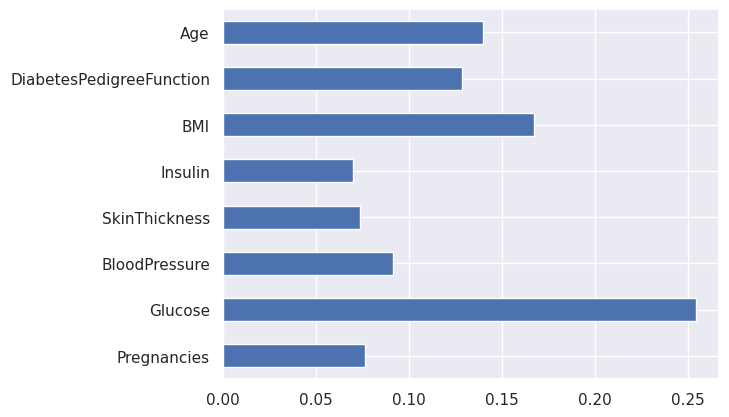

In [115]:
pd.Series(rfc.feature_importances_, index=X.columns).plot(kind='barh')

From the graph above, it is clear that ‘Glucose’ is the most essential feature in this dataset. Visualizing feature importance helps us identify which features influence the model’s predictions most.

#Saving Model – Random Forest

In [116]:
import pickle

# Firstly, we will be using the dump() function to save the model using pickle
saved_model = pickle.dumps(rfc)

# Then we will be loading that saved model
rfc_from_pickle = pickle.loads(saved_model)

# Lastly, after loading that model we will use this to make predictions
rfc_from_pickle.predict(X_test)

array([0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1])

In [117]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [118]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


Adding data points to the model will either return 0 or 1, i.e., a person with diabetes or not.

In [119]:
rfc.predict([[0, 137, 40, 35, 168, 43.1, 2.228, 33]]) #4th patient

array([1])

According to our model, this patient has diabetes.

In [120]:
rfc.predict([[10, 101, 76, 48, 180, 32.9, 0.171, 63]]) #763rd patient

array([0])

This patient does not have diabetes.

```
# This is formatted as code
```



In [121]:
rfc.predict([[1, 93, 70, 31, 0, 30.4, 0.315, 23]]) #767rd patient

array([0])

This patient does not have diabetes.
